<a href="https://colab.research.google.com/github/Shiladitya56/Machine-Learning/blob/main/SEM2/random/randata2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as pt
import seaborn as sb
import math
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler as mms
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ipynb/datasets/randata2.csv')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
cols = ['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
df[cols].value_counts()

job          marital   education          housing  loan  contact    month  day_of_week  poutcome   
admin.       married   university.degree  yes      no    cellular   aug    wed          nonexistent    76
                                                                           tue          nonexistent    75
blue-collar  married   basic.9y           no       no    telephone  may    wed          nonexistent    72
admin.       married   university.degree  yes      no    cellular   aug    thu          nonexistent    69
             single    university.degree  yes      no    cellular   aug    thu          nonexistent    68
                                                                                                       ..
management   divorced  university.degree  no       yes   cellular   jul    tue          nonexistent     1
                                                                    nov    fri          success         1
                                                    

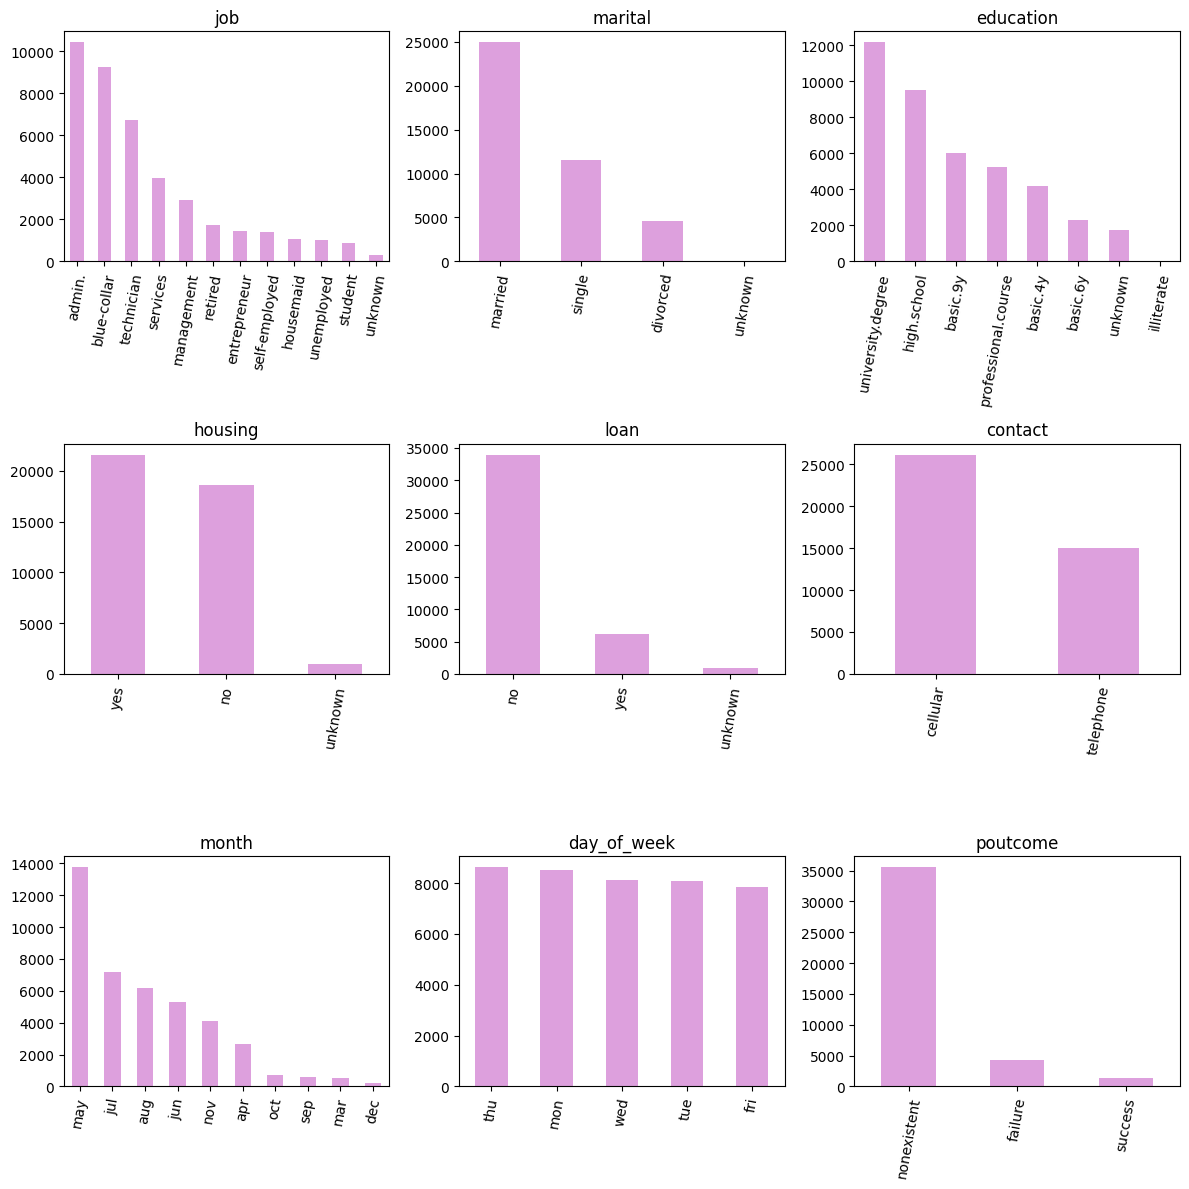

In [ ]:
fig = pt.figure(figsize=(12,12))
for i, col in enumerate(cols):
  fig.add_subplot(3, 3, i + 1)
  df[col].value_counts().plot(kind="bar", ax=pt.gca(), title=col, rot=80, color='plum')
  # pt.text(df[col[i]].unique()[i], df[col[i]].value_counts()[i], df[col[i]].value_counts()[i], ha = 'center', Bbox = dict(facecolor = 'red', alpha =.8))
fig.tight_layout();

In [ ]:
df.corr(numeric_only=True)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


In [ ]:
df.drop(df[df.housing=='unknown'].index, inplace=True)
df.drop(df[df.loan=='unknown'].index, inplace=True)
df.drop(df[df.marital=='unknown'].index, inplace=True)
df.drop(df[df.education=='illiterate'].index, inplace=True)
df.drop(df[df.job=='unknown'].index, inplace=True)
df.drop(['poutcome'], axis=1, inplace=True)
df.drop(['default'], axis=1, inplace=True)

In [ ]:
df['housing'] = pd.DataFrame(np.where(df.housing.values == 'yes', 1, 0),df.index)

In [ ]:
df['loan'] = pd.DataFrame(np.where(df.loan.values == 'yes', 1, 0),df.index)

In [ ]:
le = LabelEncoder()

In [ ]:
df.month = le.fit_transform(df.month)

In [ ]:
df.marital = le.fit_transform(df.marital)

In [ ]:
df.contact = le.fit_transform(df.contact)

In [ ]:
df.housing = le.fit_transform(df.housing)

In [ ]:
df.loan = le.fit_transform(df.loan)

In [ ]:
df.day_of_week = le.fit_transform(df.day_of_week)

In [ ]:
df.y = le.fit_transform(df.y)

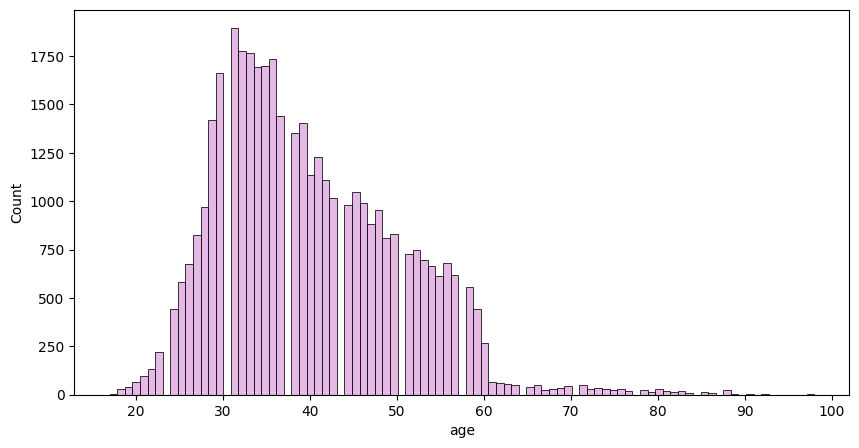

In [ ]:
pt.figure(figsize=(10,5))
sb.histplot(df['age'], color='plum');

In [ ]:
# df = pd.concat([x, y], axis=1, join='inner')
df.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,1,basic.4y,0,0,1,6,1,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,1,high.school,0,0,1,6,1,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,1,high.school,1,0,1,6,1,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,1,basic.6y,0,0,1,6,1,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,1,high.school,0,1,1,6,1,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0


In [ ]:
def standardize(col):
  return (col-col.mean())/col.std()

In [ ]:
df.drop(['marital','education','job','housing','loan'],\
        axis=1,inplace=True)

In [ ]:
df.head()

,age,contact,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,1,6,1,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,1,6,1,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,1,6,1,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,1,6,1,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,1,6,1,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0


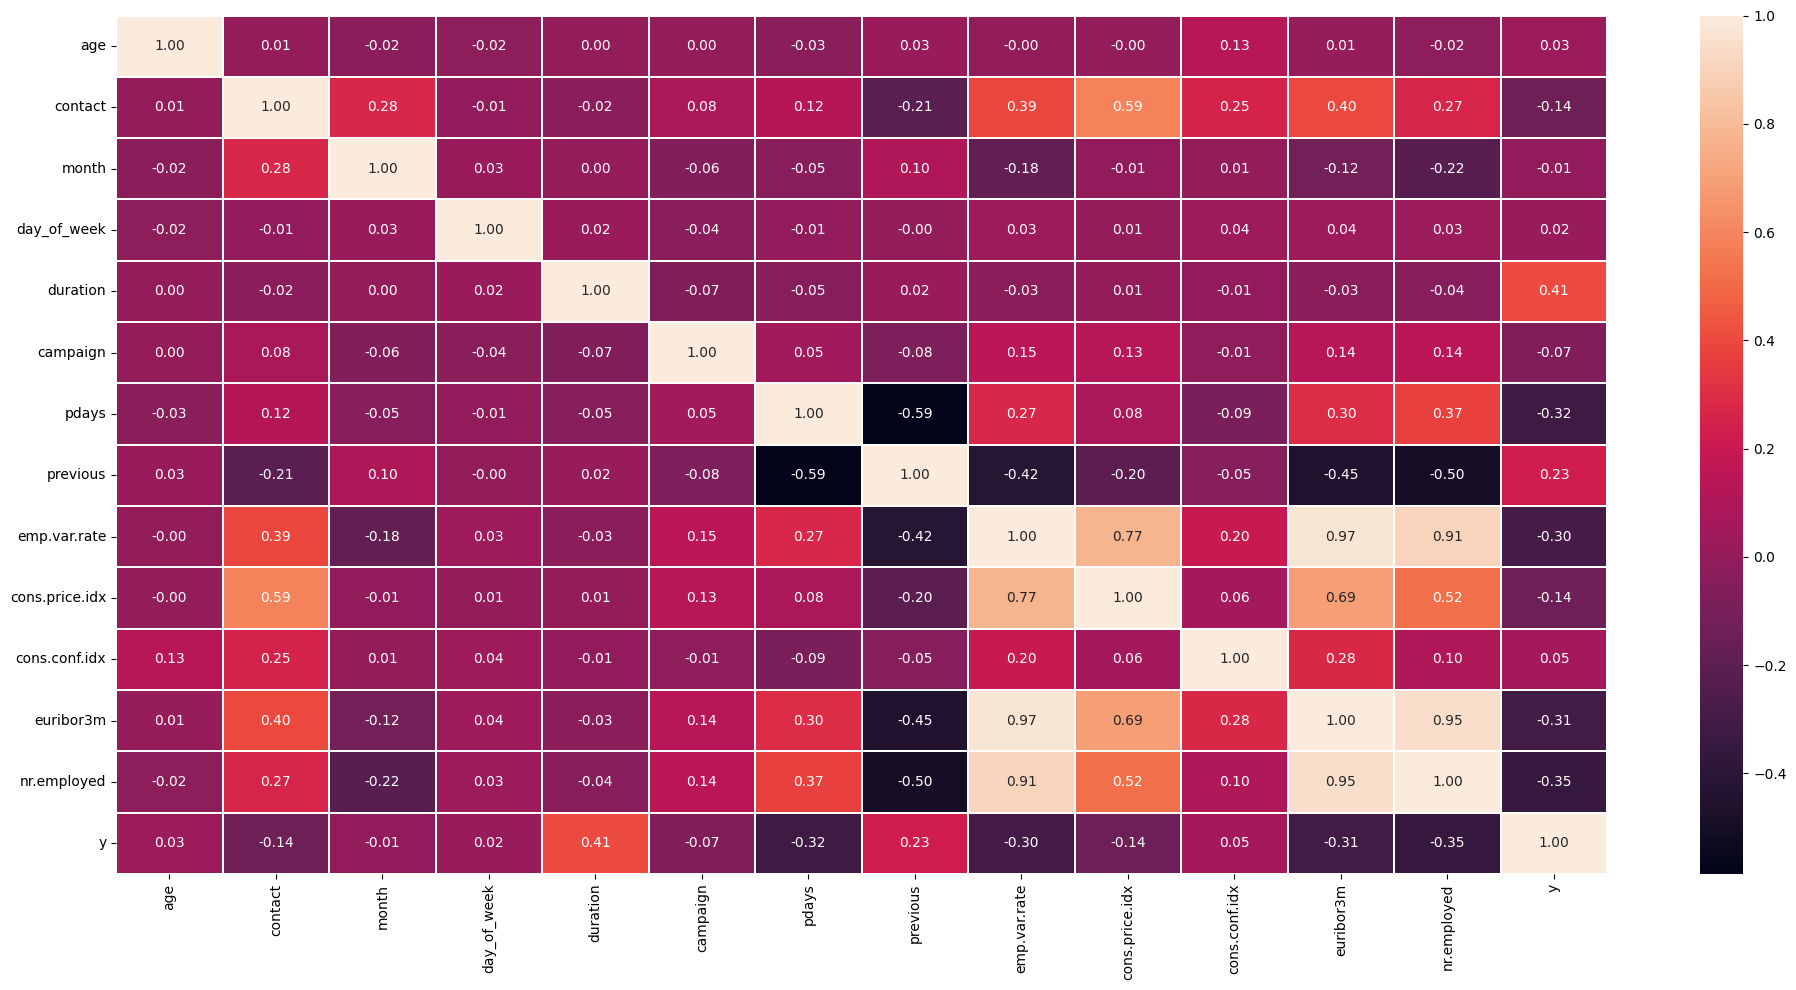

In [ ]:
pt.figure(figsize=(20,10))
sb.heatmap(df.corr(numeric_only=True), annot=True, fmt='.2f', linewidths=0.01)
pt.tight_layout();

In [ ]:
x = df.drop(['y'], axis=1)
y = df['y']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.09)

In [ ]:
lg = LogisticRegression(max_iter=10000)
lg.fit(x_train,y_train)
lgpred = lg.predict(x_test)
print(confusion_matrix(y_test, lgpred))
print(round(accuracy_score(y_test, lgpred),2)*100)

[[3095   82]
 [ 239  165]]
91.0
